In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 2., 0., 2., 3.])

In [4]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1620, 0.1910, 0.1680, 0.1710, 0.1400, 0.1680])

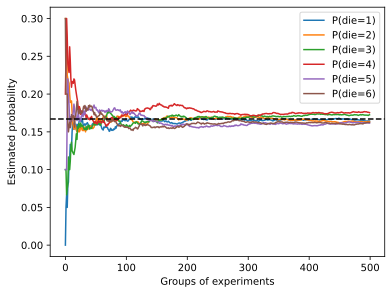

In [18]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();



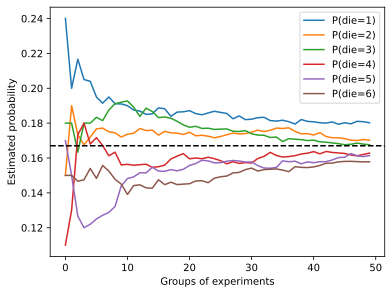

In [16]:
counts = multinomial.Multinomial(100, fair_probs).sample((50,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

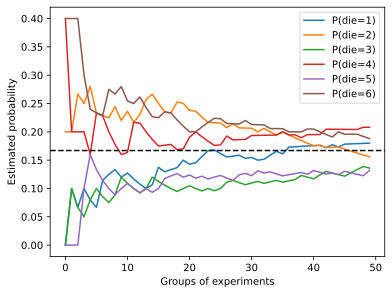

In [24]:
counts = multinomial.Multinomial(5, fair_probs).sample((50,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

练习1  如上
改变 m：
m增大 → 每组实验的 “累积次数” 更多，估计曲线收敛更快、波动更小；
m减小 → 估计曲线波动更大，收敛更慢。
改变 n：
n增大（每组样本更多）→ 每组内的估计更稳定，整体曲线波动更小；
n减小 → 每组内噪声更大，整体曲线波动更明显。

练习2
P(A∪B)和 P(A∩B)的上下限  略

练习3
由条件概率公式：P(A,B,C)=P（A,B）P(C|A,B) 又因为C只依赖于B，那么有P(C|A,B)=P(C|B),即C发不发生跟A没有关系； 同理，将P(A,B)用条件概率公式分解，那么就有P(A,B,C)=P(A)P(B|A)P(C|B)

练习4
两个测试有不同特性 具有独立性才能通过贝叶斯公式计算